# Predict the sale price of Bulldozers using Regression


## 1. Problem Definition

> How well ca we predict the future sale price of a bulldozer,give its charastrics and previous examples of how much similar bulldozers have been sold for ?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

The data  is split into three parts:

* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evalutaion

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note** : The goal for oost regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a ML which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [34]:
# import dataset
df = pd.read_csv('data/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

## Step 1 : Automated EDA (Exploratory data analysis)

In [35]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()

    max_rows_analyzed is smaller than dataset shape 412698...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 53)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Removing ['fiModelSeries'] column(s) due to mixed data type detected...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Tip_Control,93.940000,0.030000,object,3,9394,48,"fill missing values, very high nulls percent: drop, fix mixed data types"
Blade_Extension,93.940000,0.020000,object,2,9394,14,"fill missing values, very high nulls percent: drop, fix mixed data types"
Blade_Width,93.940000,0.060000,object,6,9394,3,"fill missing values, very high nulls percent: drop, fix mixed data types"
Enclosure_Type,93.940000,0.030000,object,3,9394,23,"fill missing values, very high nulls percent: drop, fix mixed data types"
Engine_Horsepower,93.940000,0.020000,object,2,9394,33,"fill missing values, very high nulls percent: drop, fix mixed data types"
Pushblock,93.940000,0.020000,object,2,9394,133,"fill missing values, very high nulls percent: drop, fix mixed data types"
Scarifier,93.930000,0.020000,object,2,9393,294,"fill missing values, very high nulls percent: drop, fix mixed data types"
Hydraulics_Flow,89.160000,0.020000,object,2,8916,20,"fill missing values, fix mixed data types"
Grouser_Tracks,89.160000,0.020000,object,2,8916,75,"fill missing values, fix mixed data types"
Coupler_System,89.130000,0.020000,object,2,8913,70,"fill missing values, fix mixed data types"


    52 Predictors classified...
        9 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['SalesID', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Pushblock', 'Scarifier', 'Tip_Control', 'fiModelSeries']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Regression problem #####################
Number of variables = 43 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 41 Categorical vars selected 
    Removing correlated variables from 2 numerics using SULO method
Selecting all (2) variables since none of them are highly correlated...
    Adding 41 categorical variables to reduced numeric variables  of 2
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 43 
    Finding Important Features using Boosted Trees algorithm...
        using 43 var

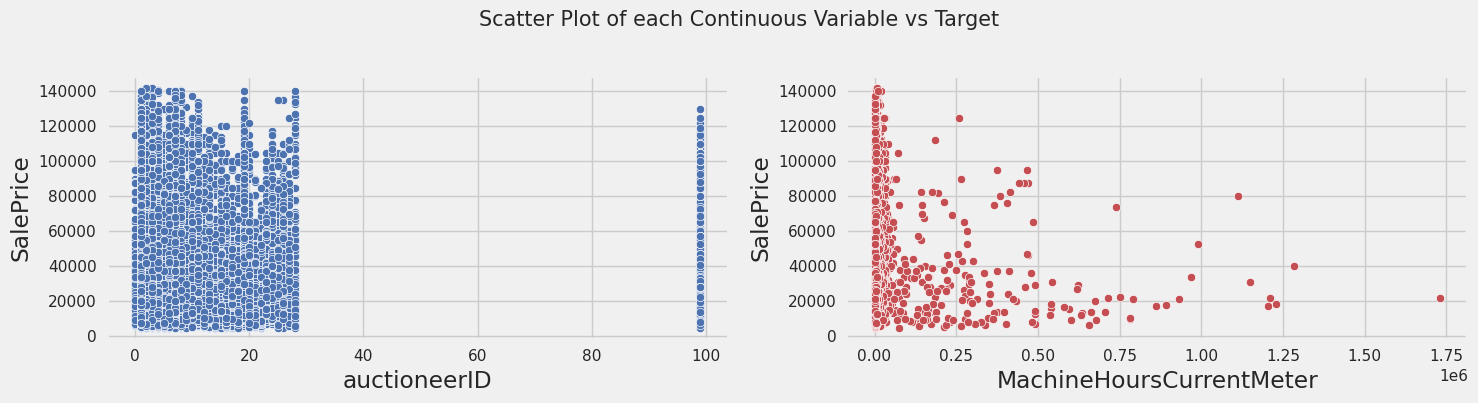

Number of All Scatter Plots = 3


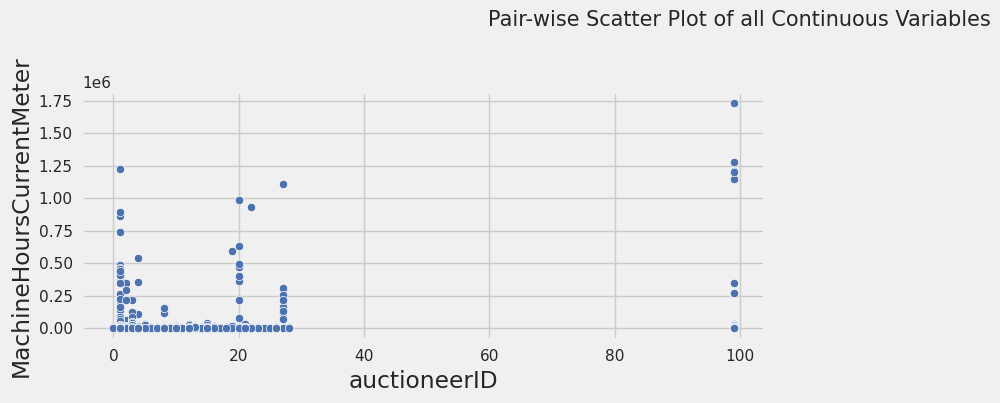

Could not draw some Distribution Plots


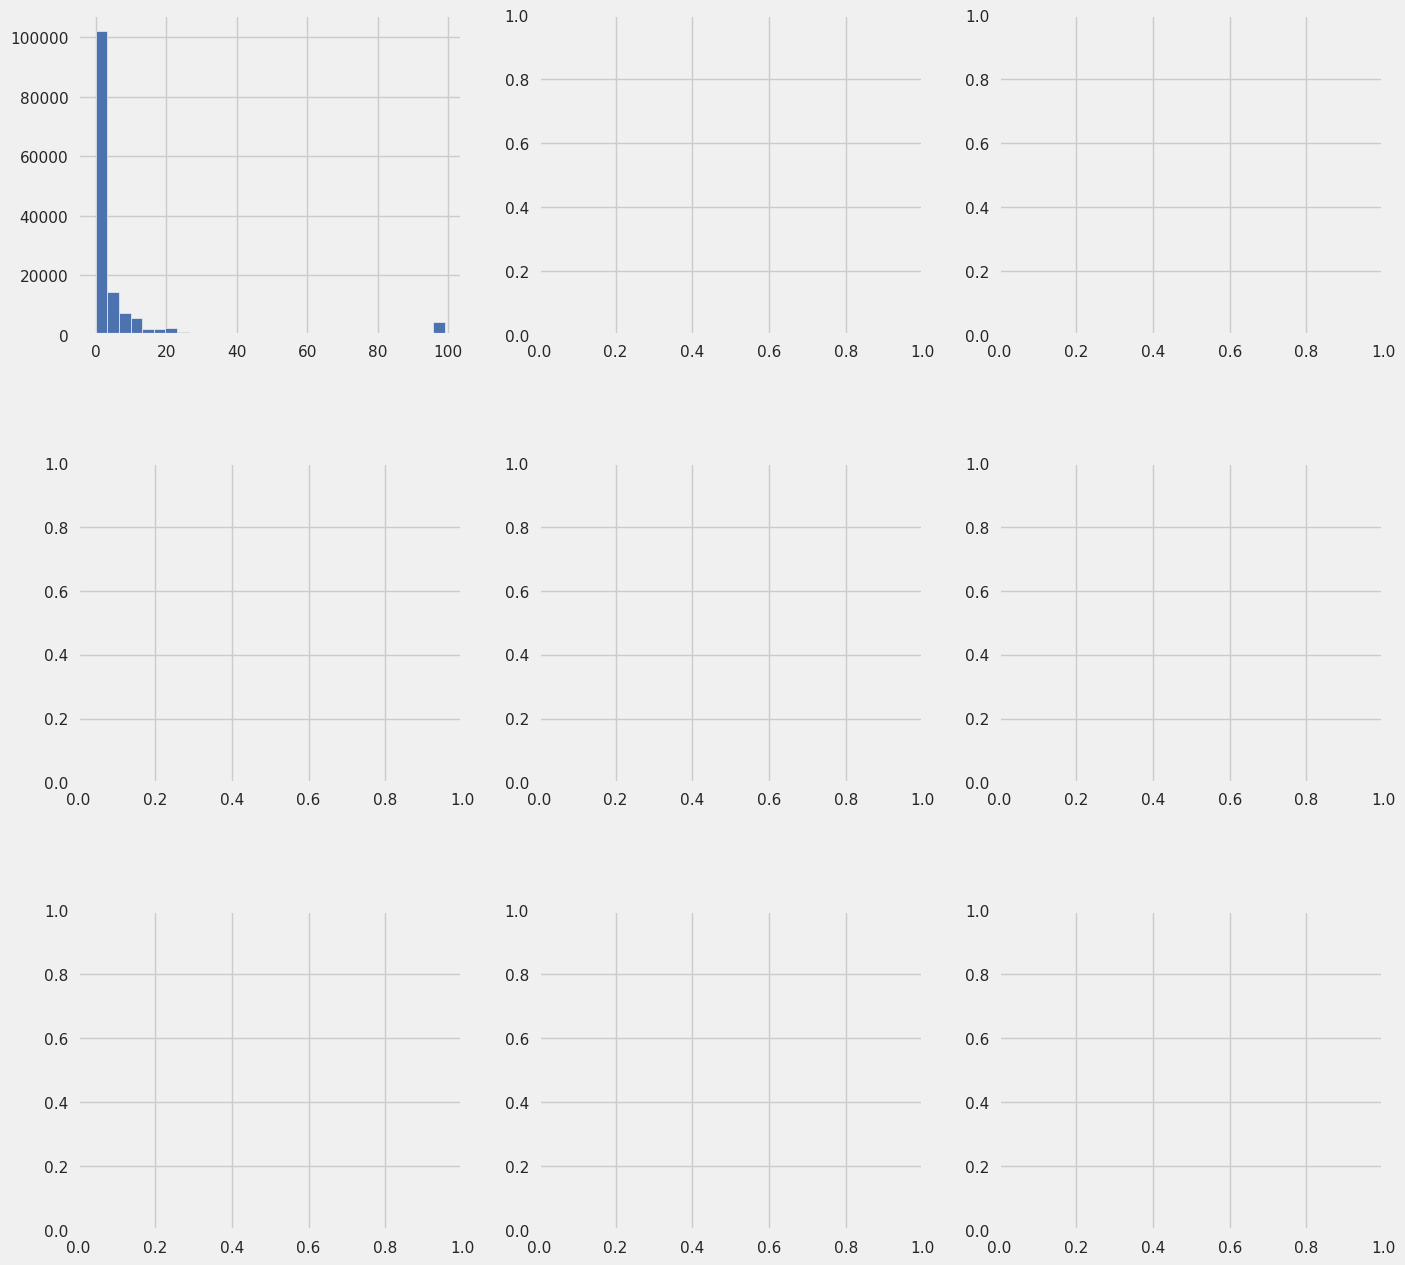

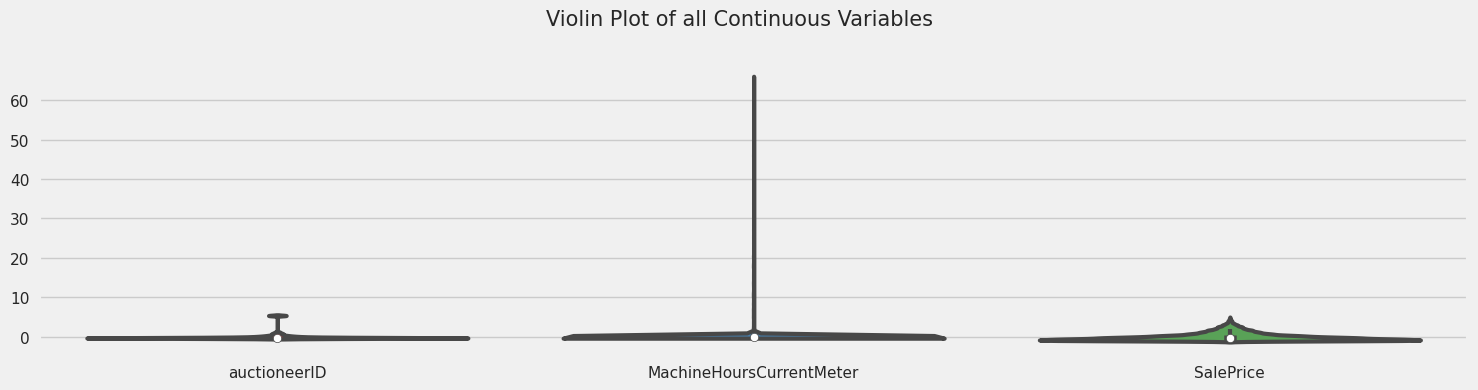

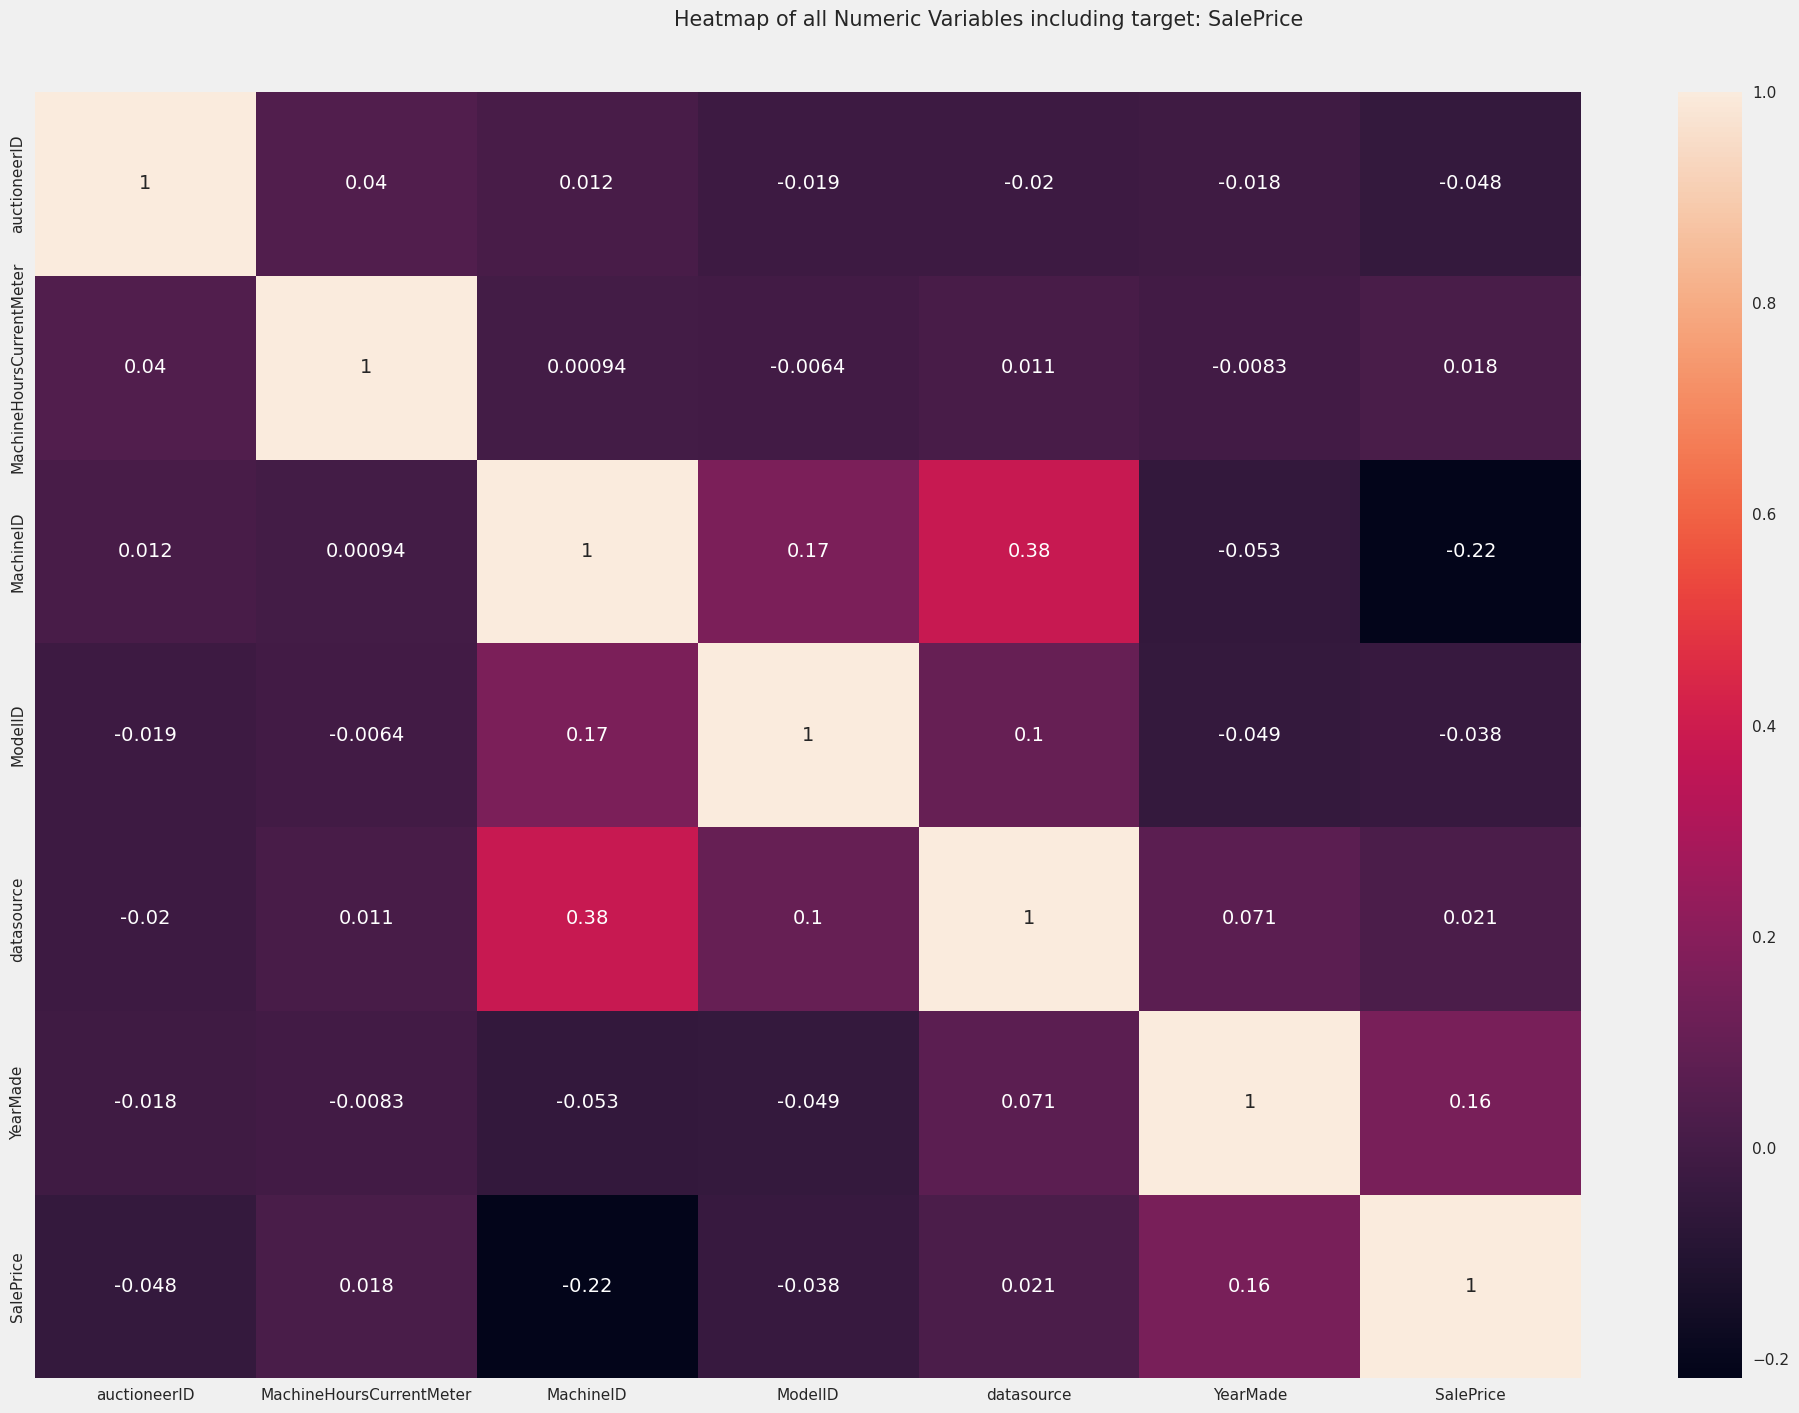

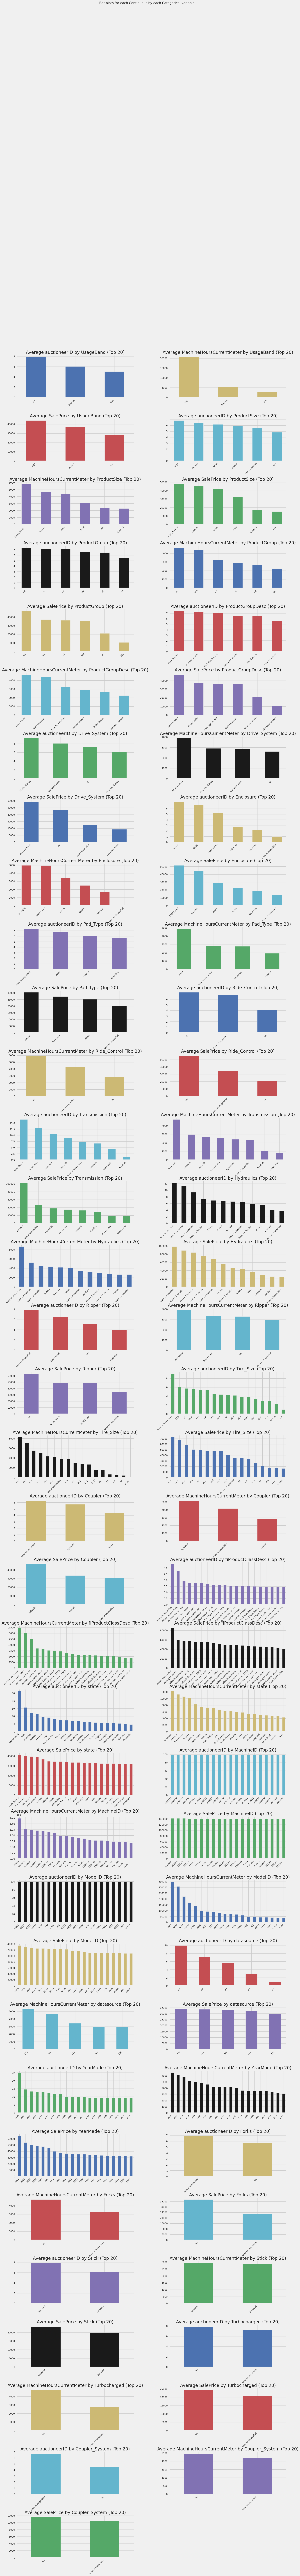

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/deepak/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/deepak/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/deepak/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/deepak/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/deepak/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/deepak/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to

Could not draw wordcloud plot for saledate
Could not draw wordcloud plot for fiModelDesc
Could not draw wordcloud plot for fiBaseModel
Could not draw wordcloud plot for fiSecondaryDesc
Could not draw wordcloud plot for fiModelDescriptor
All Plots done
Time to run AutoViz = 41 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


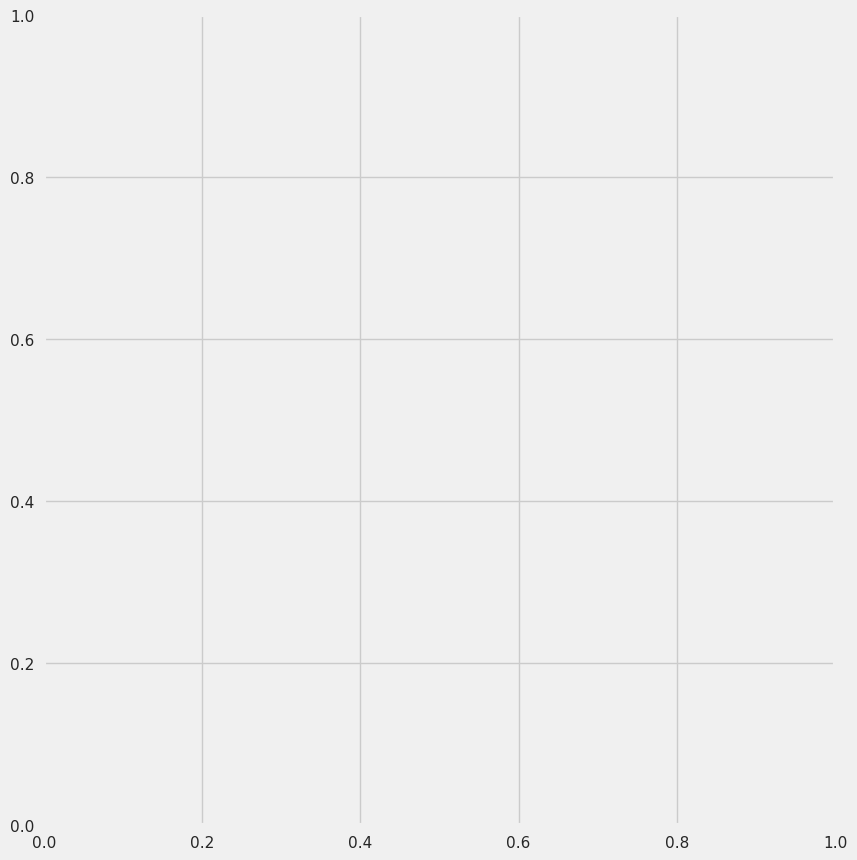

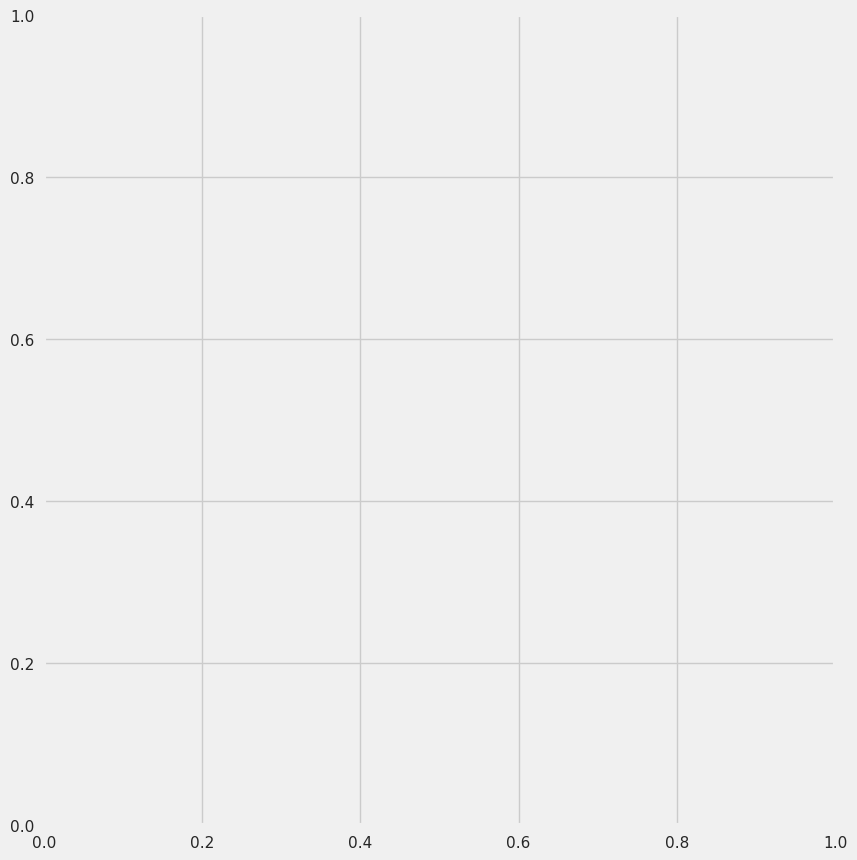

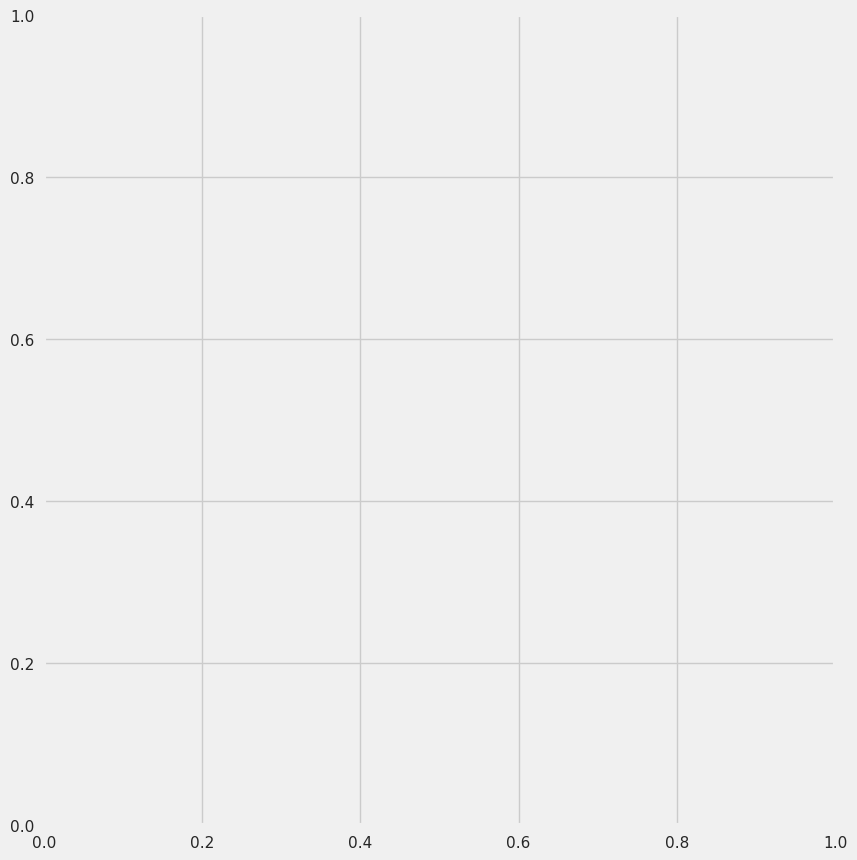

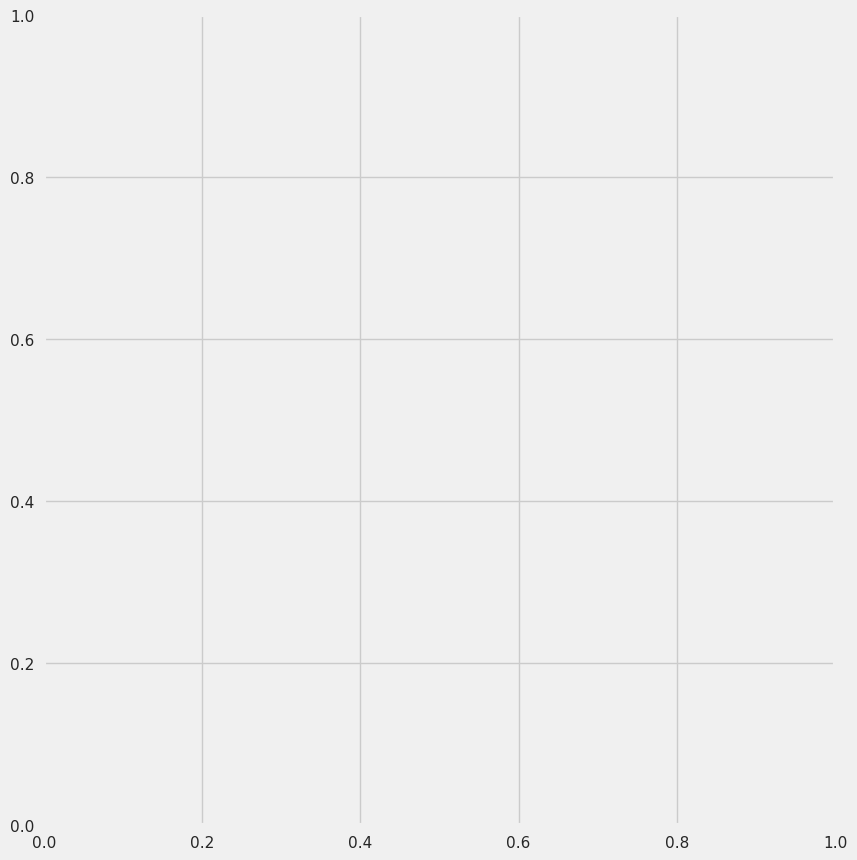

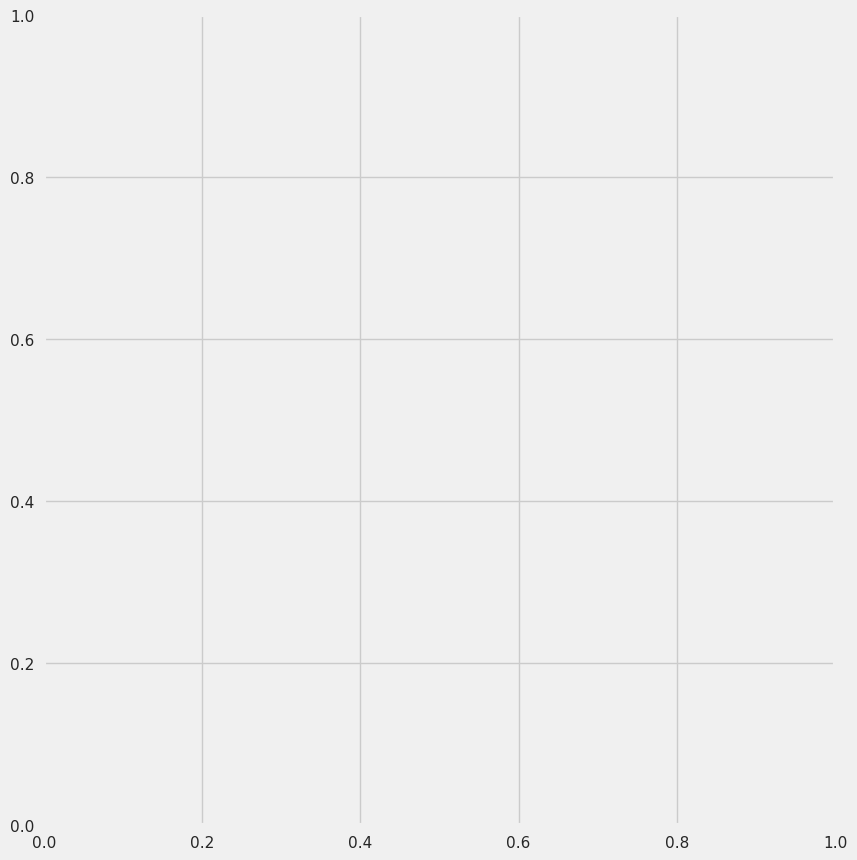

In [36]:
%matplotlib inline
filename = 'data/TrainAndValid.csv'
target_variable='SalePrice'

dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    save_plot_dir=None,
)

## Step 2: Preprocess the data according to Results by EDA
    1. Cleaning of data
        1.1. Sort the data according to `saledate`
        1.2. Remove un-nessccery data
        1.3. Remove duplicates
    2. Converting object into categorical types
    3. Fill missing values
        3.1. Fill numerical missing values
        3.2. Covert categorical values into numerical values 
             also fill missing values

### Step 2.1 : Cleaning of Data

In [11]:
df['saledate'].dt.year

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saledate, Length: 412698, dtype: int64

In [37]:
# 2.1.1. Sort the data according to `saledate`
df.sort_values(by=['saledate'],inplace=True,ascending=True)

# also we want split the date
df['saleYear'] = df['saledate'].dt.year
df['saleMonth'] = df['saledate'].dt.month
df['saleDay'] = df['saledate'].dt.day
df['saleYearofDay'] = df['saledate'].dt.day_of_year
df['saleWeekofDay'] = df['saledate'].dt.day_of_week

In [38]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [39]:
# 2.1.2. Remove un-nessccery data
# we can remove auctioneerID,ModelID,MachineID,SalesID and saledate
can_remove = ['auctioneerID','ModelID','MachineID','SalesID','saledate']

df.drop(columns=can_remove,axis=1,inplace=True)

In [40]:
df.head().T

,205615,274835,141296,212552,62755
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
datasource,132,132,132,132,132
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B
fiBaseModel,TD20,A66,D7,A62,D3
fiSecondaryDesc,NaN,NaN,G,NaN,B
fiModelSeries,NaN,NaN,NaN,NaN,NaN
fiModelDescriptor,NaN,NaN,NaN,NaN,NaN


In [41]:
# 2.1.3. Remove duplicates
df = df.drop_duplicates(keep='first')
df=df.reset_index(drop=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399434 entries, 0 to 399433
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 399434 non-null  float64
 1   datasource                399434 non-null  int64  
 2   YearMade                  399434 non-null  int64  
 3   MachineHoursCurrentMeter  145264 non-null  float64
 4   UsageBand                 73617 non-null   object 
 5   fiModelDesc               399434 non-null  object 
 6   fiBaseModel               399434 non-null  object 
 7   fiSecondaryDesc           263304 non-null  object 
 8   fiModelSeries             57867 non-null   object 
 9   fiModelDescriptor         73916 non-null   object 
 10  ProductSize               193235 non-null  object 
 11  fiProductClassDesc        399434 non-null  object 
 12  state                     399434 non-null  object 
 13  ProductGroup              399434 non-null  o

### Step 2.2. Converting object into categorical types

In [43]:
types = pd.api.types
def convert_object_to_category(df):
    for label,content in df.items():
        if types.is_string_dtype(content):
            df[label] = content.astype('category').cat.as_ordered()
    return df
            
df = convert_object_to_category(df)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399434 entries, 0 to 399433
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalePrice                 399434 non-null  float64 
 1   datasource                399434 non-null  int64   
 2   YearMade                  399434 non-null  int64   
 3   MachineHoursCurrentMeter  145264 non-null  float64 
 4   UsageBand                 73617 non-null   category
 5   fiModelDesc               399434 non-null  category
 6   fiBaseModel               399434 non-null  category
 7   fiSecondaryDesc           263304 non-null  category
 8   fiModelSeries             57867 non-null   category
 9   fiModelDescriptor         73916 non-null   category
 10  ProductSize               193235 non-null  category
 11  fiProductClassDesc        399434 non-null  category
 12  state                     399434 non-null  category
 13  ProductGroup              399

### 2.3. Fill missing values

In [47]:
# 2.3.1. Fill numerical missing values
def fill_numeric_missing_values(df):
    for label,content in df.items():
        if types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
    return df

In [48]:
df.isna().sum()

SalePrice                        0
datasource                       0
YearMade                         0
MachineHoursCurrentMeter    254170
UsageBand                   325817
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             136130
fiModelSeries               341567
fiModelDescriptor           325518
ProductSize                 206199
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                298565
Enclosure                      334
Forks                       212020
Pad_Type                    324225
Ride_Control                253811
Stick                       324225
Transmission                218715
Turbocharged                324225
Blade_Extension             373782
Blade_Width                 373782
Enclosure_Type              373782
Engine_Horsepower           373782
Hydraulics                   76673
Pushblock           

In [49]:
df = fill_numeric_missing_values(df)

In [50]:
df.isna().sum()

SalePrice                        0
datasource                       0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   325817
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             136130
fiModelSeries               341567
fiModelDescriptor           325518
ProductSize                 206199
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                298565
Enclosure                      334
Forks                       212020
Pad_Type                    324225
Ride_Control                253811
Stick                       324225
Transmission                218715
Turbocharged                324225
Blade_Extension             373782
Blade_Width                 373782
Enclosure_Type              373782
Engine_Horsepower           373782
Hydraulics                   76673
Pushblock           

In [53]:
# 2.3.2. Covert categorical values into numerical values also fill missing values
def fill_categorical_null_values_and_convert(df):
    for label,content in df.items():
        if not types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes + 1
    return df

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399434 entries, 0 to 399433
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalePrice                 399434 non-null  float64 
 1   datasource                399434 non-null  int64   
 2   YearMade                  399434 non-null  int64   
 3   MachineHoursCurrentMeter  399434 non-null  float64 
 4   UsageBand                 73617 non-null   category
 5   fiModelDesc               399434 non-null  category
 6   fiBaseModel               399434 non-null  category
 7   fiSecondaryDesc           263304 non-null  category
 8   fiModelSeries             57867 non-null   category
 9   fiModelDescriptor         73916 non-null   category
 10  ProductSize               193235 non-null  category
 11  fiProductClassDesc        399434 non-null  category
 12  state                     399434 non-null  category
 13  ProductGroup              399

In [55]:
df = fill_categorical_null_values_and_convert(df)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399434 entries, 0 to 399433
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 399434 non-null  float64
 1   datasource                399434 non-null  int64  
 2   YearMade                  399434 non-null  int64  
 3   MachineHoursCurrentMeter  399434 non-null  float64
 4   UsageBand                 399434 non-null  int8   
 5   fiModelDesc               399434 non-null  int16  
 6   fiBaseModel               399434 non-null  int16  
 7   fiSecondaryDesc           399434 non-null  int16  
 8   fiModelSeries             399434 non-null  int8   
 9   fiModelDescriptor         399434 non-null  int16  
 10  ProductSize               399434 non-null  int8   
 11  fiProductClassDesc        399434 non-null  int8   
 12  state                     399434 non-null  int8   
 13  ProductGroup              399434 non-null  i

### Preprocessing completed now we save the dat

In [ ]:
# save the data
df = df.to_csv('data/preprocessed_data.csv',index=False)

In [246]:
# added some more cleaning on data on ./predict_preprocess.ipynb
df = pd.read_csv('data/df_without_outliers.csv',low_memory=False)
df.isna().sum()

SalePrice                   0
datasource                  0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Hydraulics                  0
Ripper                      0
Scarifier                   0
Tire_Size                   0
Coupler                     0
Coupler_System              0
Grouser_Tracks              0
Hydraulics_Flow             0
Track_Type                  0
Undercarriage_Pad_Width     0
Stick_Leng

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255706 entries, 0 to 255705
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 255706 non-null  float64
 1   datasource                255706 non-null  int64  
 2   YearMade                  255706 non-null  int64  
 3   MachineHoursCurrentMeter  255706 non-null  float64
 4   UsageBand                 255706 non-null  int64  
 5   fiModelDesc               255706 non-null  int64  
 6   fiBaseModel               255706 non-null  int64  
 7   fiSecondaryDesc           255706 non-null  int64  
 8   fiModelSeries             255706 non-null  int64  
 9   fiModelDescriptor         255706 non-null  int64  
 10  ProductSize               255706 non-null  int64  
 11  fiProductClassDesc        255706 non-null  int64  
 12  state                     255706 non-null  int64  
 13  ProductGroup              255706 non-null  i

## Step 3 : Build Model Evaluation matrix

In [250]:
# create evaluation function (RMSLE)

from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root means squared log error between prediction and true labels.
    """
    
    return np.sqrt(abs(mean_squared_log_error(y_true=y_test,y_pred=y_preds)))

# create function to evaluate models on a few different levels 
def show_scores(model,X_train,X_valid,y_train,y_valid):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE ": mean_absolute_error(y_train,train_preds),
              "Valid MAE":mean_absolute_error(y_valid,val_preds),"Training RMSLE": rmsle(y_train,train_preds),
             "Valid RMSLE":rmsle(y_valid,val_preds),"Training R^2":r2_score(y_train,train_preds),
             "Validation R^2": r2_score(y_valid,val_preds),}
    return scores

In [251]:


# create function to evaluate models on a few different levels 
def show_scores_absolute(model,X_train,X_valid,y_train,y_valid):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE ": mean_absolute_error(y_train,train_preds),
              "Valid MAE":mean_absolute_error(y_valid,val_preds),"Training R^2":r2_score(y_train,train_preds),
             "Validation R^2": r2_score(y_valid,val_preds),}
    return scores

## Step 4: Build Model
    1. Split the data
        1.1. make a copy dataframe
        1.2. split data into train and validation set
        1.3. split each training and validation set into X_test,X_valid,y_test and y_valid
    2. Build model on LinearRegression
        2.1. Starndarizing data
        2.2. Train the model
        2.3. evaluate the model
    3. Build model on Rigid Regression
        3.1. Hyper parameter tuning
        3.2. Training
        3.3. Evaluating
    4. Build model on Lasso Regression
        4.1. Hyper parameter tuning
        4.2. Training
        4.3. Evaluating
    5. Build model on RandomForestRegression
        5.1. Hyper parameter tuning
        5.2. Training
        5.3. Evaluating

### Step 4.1 Split the data

In [252]:
# 4.1.1. make a copy dataframe
df_copy = df.copy()

In [253]:
# 4.1.2. split data into train and validation set
validation_set = df_copy[df_copy.saleYear == 2012]
trainig_set = df_copy[df_copy.saleYear != 2012]

len(trainig_set),len(vaidation_set)

(250864, 11297)

In [254]:
# 4.1.3. split each training and validation set into X_test,X_valid,y_test and y_valid
X_train,y_train = trainig_set.drop('SalePrice',axis=1),trainig_set.SalePrice
X_valid,y_valid = validation_set.drop('SalePrice',axis=1),validation_set.SalePrice

### Step 4.2. Build model on LinearRegression

In [255]:
# 4.2.1 Starndarizing data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [256]:
std_X_train = scalar.fit_transform(X_train)
std_X_valid = scalar.transform(X_valid)

In [257]:
# 4.2.2. Train the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_regression_model = LinearRegression()

In [258]:
%%time
mse=cross_val_score(linear_regression_model,std_X_train,y_train,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)           

CPU times: user 41.9 ms, sys: 96.3 ms, total: 138 ms
Wall time: 2.91 s


In [259]:
np.mean(mse)

-201582154.2535224

In [260]:
linear_regression_model.fit(std_X_train,y_train)

LinearRegression()

In [261]:
# 4.2.3. evaluate the model
linear_regression_prediction = linear_regression_model.predict(std_X_valid)

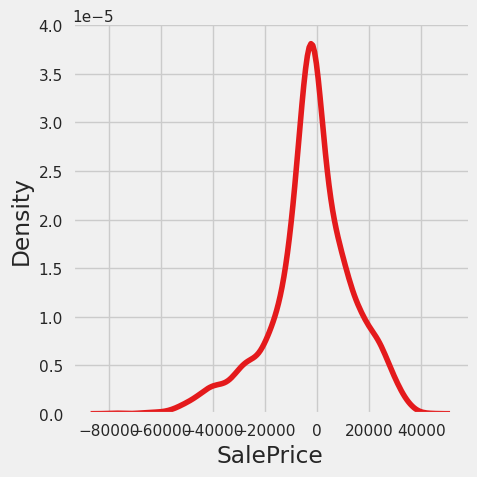

In [243]:
import seaborn as sns
sns.displot(linear_regression_prediction-y_valid,kind='kde')

In [244]:
show_scores_absolute(linear_regression_model,std_X_train,std_X_valid,y_train,y_valid)

{'Training MAE ': 9758.710921599013,
 'Valid MAE': 11677.957584832544,
 'Training R^2': 0.5090573078227016,
 'Validation R^2': 0.49073287592414194}

In [245]:
from sklearn.metrics import r2_score
score = r2_score(linear_regression_prediction,y_valid)

In [193]:
score

-0.03160065171847459

### **conclusion** : not a best model R^2 value must be between 0 and 1

### Step 4.3. Build model on Rigid Regression

In [194]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [195]:
ridge_model = Ridge()

In [196]:
# 4.3.1. Hyper parameter tuning
parmeter = {'alpha': np.arange(1,500,2)}
ridge_cv_model = GridSearchCV(rigde_model,param_grid=parmeter,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)

In [197]:
%%time
ridge_cv_model.fit(std_X_train,y_train)

CPU times: user 6.97 s, sys: 3.45 s, total: 10.4 s
Wall time: 1min 21s


GridSearchCV(cv=5, estimator=Ridge(alpha=367), n_jobs=-1,
             param_grid={'alpha': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161...
       339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 361, 363,
       365, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389,
       391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411, 413, 415,
       417, 419, 421, 423, 425, 427, 429, 431, 433, 435, 437, 439, 441,
       443, 445, 447, 449, 451, 453, 455, 457, 459, 461, 463, 465, 467,
       469, 471, 473, 475, 477, 479, 481, 483, 485, 487, 489, 491, 493,
       495, 497, 499])},
             scoring='neg_mean_squared_error')

In [198]:
ridge_cv_model.best_params_

{'alpha': 71}

In [199]:
# 4.3.2. Training
rigde_model = Ridge(alpha=71)

In [200]:
ridge_model.fit(std_X_train,y_train)

Ridge()

In [201]:
# 4.3.3. Evaluation
ridge_predict = ridge_model.predict(std_X_valid)

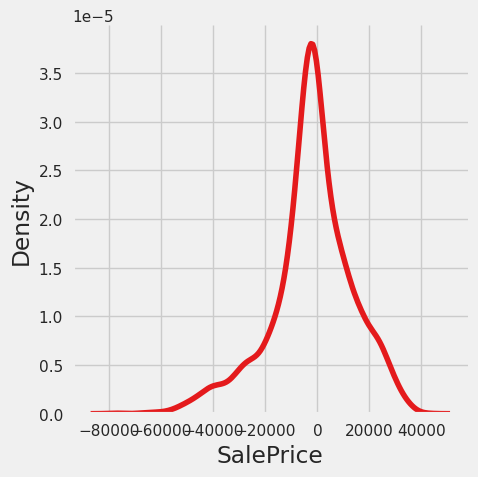

In [202]:
sns.displot(ridge_predict-y_valid,kind='kde')

In [225]:
show_scores_absolute(ridge_model,std_X_train,std_X_valid,y_train,y_valid)

{'Training MAE ': 9757.080845951325,
 'Valid MAE': 11683.672473076156,
 'Training R^2': 0.5091536475293155,
 'Validation R^2': 0.4900217707050053}

In [203]:
score = r2_score(linear_regression_prediction,y_valid)
score

-0.03160065171847459

### **conclusion** : not a best model R^2 value must be between 0 and 1
**it is not a overfit data**

### Step 4.4. Build model on Lasso Regression

In [204]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()

In [205]:
# 4.3.1. Hyper parameter tuning
parmeter = {'alpha': [2,5,10,20,30,40,50,60,7,80,90]}
lasso_cv_model = GridSearchCV(lasso_regressor,param_grid=parmeter,scoring='neg_mean_squared_error',cv=2,n_jobs=-1,)

In [206]:
%%time
lasso_cv_model.fit(std_X_train,y_train)

/home/deepak/desktop-alternative/regression/self-projects/bulldozer-project/env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+10, tolerance: 4.620e+09
  model = cd_fast.enet_coordinate_descent(
/home/deepak/desktop-alternative/regression/self-projects/bulldozer-project/env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.072e+09, tolerance: 4.620e+09
  model = cd_fast.enet_coordinate_descent(
/home/deepak/desktop-alternative/regression/self-projects/bulldozer-project/env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: Conver

CPU times: user 18.1 s, sys: 300 ms, total: 18.4 s
Wall time: 4min 22s


GridSearchCV(cv=2, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [2, 5, 10, 20, 30, 40, 50, 60, 7, 80, 90]},
             scoring='neg_mean_squared_error')

In [207]:
lasso_cv_model.best_params_

{'alpha': 90}

In [208]:
# 4.4.2. Training
lasso_regressor=Lasso(alpha=90)

In [209]:
%%time
lasso_regressor.fit(std_X_train,y_train)

CPU times: user 18.8 s, sys: 44.3 ms, total: 18.8 s
Wall time: 4.81 s


Lasso(alpha=90)

In [210]:
# 4.4.3. Evaluation
lasso_prediction = lasso_regressor.predict(std_X_valid)

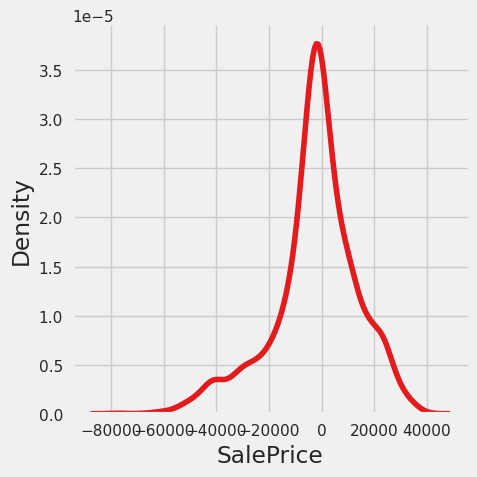

In [211]:
sns.displot(lasso_prediction-y_valid,kind='kde')

In [226]:
show_scores_absolute(lasso_regressor,std_X_train,std_X_valid,y_train,y_valid)

{'Training MAE ': 9905.69688681831,
 'Valid MAE': 11859.333343985807,
 'Training R^2': 0.4914792927042385,
 'Validation R^2': 0.4626651592103529}

In [212]:
score = r2_score(linear_regression_prediction,y_valid)
score

-0.03160065171847459

### **conclusion** : not a best model R^2 value must be between 0 and 1

### Step 5. Build model on RandomForestRegression

In [213]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
%%time
# 4.5.1 : Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Differen RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,2),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instatiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,
                              n_iter=100,cv=5,verbose=True)

rs_model.fit(std_X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 4min 29s, sys: 25.4 s, total: 4min 55s
Wall time: 7min 17s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])},
                   verbose=True)

In [218]:
rs_model.best_params_

{'n_estimators': 86,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [219]:
%%time
# 4.5.2. Training
random_forest_regressor = RandomForestRegressor(n_jobs=-1,random_state=42,n_estimators=86,
                                    max_samples=None,min_samples_split=14,min_samples_leaf=1,
                                    max_depth=None,max_features='auto'
                                   )
random_forest_regressor.fit(std_X_train,y_train)

CPU times: user 6min 16s, sys: 884 ms, total: 6min 17s
Wall time: 51.5 s


RandomForestRegressor(max_features='auto', min_samples_split=14,
                      n_estimators=86, n_jobs=-1, random_state=42)

In [220]:
# 4.5.3 evaluate
RR_prediction= random_forest_regressor.predict(std_X_valid)

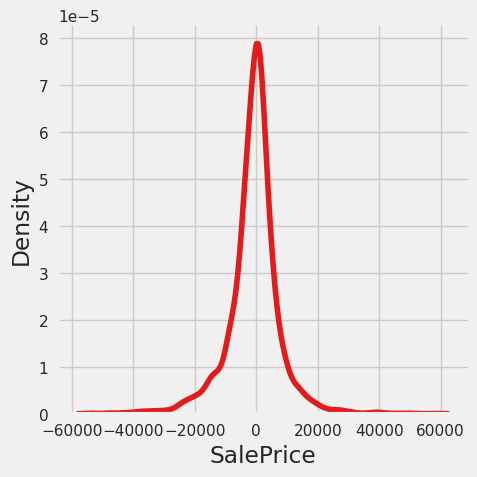

In [221]:
sns.displot(RR_prediction-y_valid,kind='kde')

In [222]:
show_scores(random_forest_regressor,std_X_train,std_X_valid,y_train,y_valid)

{'Training MAE ': 2789.2433494120423,
 'Valid MAE': 5628.906812296054,
 'Training RMSLE': 0.14345819928376627,
 'Valid RMSLE': 0.2355018806493416,
 'Training R^2': 0.9524940087426237,
 'Validation R^2': 0.8531031037072513}

**R^2 value colses to 1 , this model can be choosen**